
# Exercise 5: Metrics and Object Oriented Programming

Object oriented programming (OOP) is a popular programming paradigm.  
It is based on the idea of 'objects', that have attributes and methods to handle data.  

Before you start, please get familiar with the basic concept of OOP by looking at some of the available resources online. 
If you search for object oriented programming with python on the internet, you will find tons of material, from short beginner tutorials to whole courses.  
e.g. [this one](https://realpython.com/python3-object-oriented-programming/) or [this](https://www.codecademy.com/learn/learn-python/modules/learn-python-introduction-to-classes-u)



In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The next cell shows an example of how sensitivity can be computed.

In [12]:
def compute_sensitivity(x,y):
    """
    Args:
        x: one hot encoded vector of predictions
        y: one hot encoded vector of ground truth
    """
    if x.shape != y.shape:
        raise ValueError("x and y should have the same shape.")
    
    tp = ((x+y)==2).sum()
    p = y.sum()
    return tp/p
    

Lets define small vectors x and y and test the sensitivity function.  
You can play around with the values in x and y vectors 

In [20]:
x = np.array([1, 1, 0, 1])
y = np.array([1, 1, 1, 0])
compute_sensitivity(x,y)

0.6666666666666666

now let's define a function to compute precision in a similar fashion

In [18]:
def compute_precision(x,y):
    """
    Args:
        x: one hot encoded vector of predictions
        y: one hot encoded vector of ground truth
    """
    if x.shape != y.shape:
        raise ValueError("x and y should have the same shape.")
    
    tp = ((x+y)==2).sum()
    fp = ((x-y)==1).sum()
    return tp/(tp+fp)

and let's test it with our example vectors:

In [21]:
compute_precision(x,y)

0.6666666666666666

You can see that both functions had to compute the false positives (tp), which is fine in this small example, but with very large multi-dimensional tensors would be inconvenient.
Also, if you want to make changes to the calculation of tp you would have to do it in both functions.
One solution would be to extract the true positive calculation into a new function, but in this exercise we want to focus on OOP.  

Let's define a class ConfusionMatrix, that is initialized with our 2 vectors x and y and stores the values of tp, tn... as class attributes.

In [104]:
class ConfusionMatrix():
    def __init__(self, x, y):
        """
        Args:
            x: one hot encoded vector of predictions
            y: one hot encoded vector of ground truth
        """
        self.tp = ((x+y)==2).sum()
        self.fp = ((x-y)==1).sum()
        self.p = y.sum()


now let's create an instance (object) of the class ConfusionMatrix:

In [105]:
cm = ConfusionMatrix(x,y)

now we can have a look at the objects attributes:

In [106]:
cm.tp
cm.fp

1

We can also define some class methods, e.g. to compute sensitivity

In [107]:
class ConfusionMatrix():
    def __init__(self, x, y):
        """
        Args:
            x: one hot encoded vector of predictions
            y: one hot encoded vector of ground truth
        """
        self.tp = ((x+y)==2).sum()
        self.fp = ((x-y)==1).sum()
        self.p = y.sum()
    
    def get_sensitivity(self):
        return self.tp/self.p

In [108]:
cm = ConfusionMatrix(x,y)
cm.get_sensitivity()

0.6666666666666666


### Homework:


Now you can complete the class ConfusionMatrix by adding methods for specificity, precision and F1 score. Feel free to add more class attributes if needed.  
The formulas to compute confusion matrix based metrics can be found in the lecture slides or: [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [38]:
### Homework complete the class ConfusionMatrix here
class ConfusionMatrix():
    def __init__(self, x, y):
        self.tp = ((x+y)==2).sum()
        self.fp = ((x-y)==1).sum()
        self.p = y.sum()
        self.tn = ((x+y)==0).sum() 
        self.fn = ((self.p-self.tp)) or (y-x)==1
        
    
    def get_sensitivity(self):
        return self.tp/self.p
    
    def get_specificity(self):
        # fill here
        return self.tn/(self.tn+self.fp)
    
    def get_precision(self):
        # fill here
        return self.tp/(self.tp+self.fp)
    
    def get_f1score(self):
        # fill here
        return (2*self.tp/(2*self.tp + self.fp + self.fn))

Finally we want to use our ConfusionMatrix class to plot the ROC:  
first we will load a .csv file with values for prediction and actual labels:

In [82]:
!wget https://github.com/CS4MS/CS4MS_S22/raw/main/data/exercise5_prediction.csv
pred_df = pd.read_csv('exercise5_prediction.csv')

pred_df

,actual,prediction
0,0,0.144127
1,1,0.638434
2,0,0.232083
3,0,0.339769
4,0,0.214437
...,...,...
95,0,0.439689
96,0,0.416856
97,0,0.283074
98,1,0.860123


the dataframe has 100 rows and 2 columns for actual values and prediction.  
as you can see, the prediction values are floating point and not 0 or 1.  
We need to define a threshold that decides if a prediction gets assigned to class 0 or 1.


In [98]:
threshold = 0.5
# first let's turn the dataframe into separate numpy arrays
actual = np.array(pred_df['actual'])
pred = np.array(pred_df['prediction'])

# now we can define a new array new_pred and set the numbers higher than the threshold to 1 and the ones lower to 0.
new_pred = np.zeros_like(pred)
new_pred[pred> threshold] = 1


In [100]:
# and we can compute our metrics with the confusion matrix:
cm = ConfusionMatrix(new_pred,actual)
#cm.get_sensitivity()
#cm.get_specificity()
cm.get_f1score()

0.7708333333333334

The threshold of 0.5 seems to have been a good choice. But what if we had used a different value?  


In [101]:
# for plotting the ROC we need to use multiple thresholds:
# using numpy linspace we can create 100 evenly spaced numbers between 0 and 1:
thresholds = np.linspace(0,1,100)
#print(thresholds)


### Homework

use the thresholds to threshold the predictions, and then compute the metrics needed to plot the ROC.  
you can use the lists below to store x and y values.

In [ ]:
y_values = [] 
x_values = []
# put your code here:
for threshold in thresholds:
    new_pred = np.zeros_like(pred)
    new_pred[pred>threshold] = 1
    cm = ConfusionMatrix(new_pred,actual)
    sens = cm.get_sensitivity()
    spec = cm.get_specificity()
    y_values.append(sens)
    x_values.append(1-spec)

now you can use the cell below to plot the ROC.  
the dotted red line shows the ROC for a random classifier

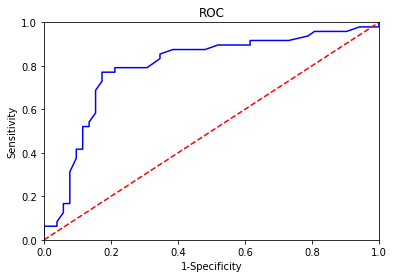

In [103]:
# plot ROC curve
plt.title('ROC')
plt.plot(x_values,y_values, 'b')
#plt.plot(roc_values)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()